▣ aiffel<sup>https://online.aiffel.io</sup> 과정 : 딥러닝으로 시작하는 컴퓨터 비전

In [1]:
%run -i ..\preliminary\myLib.py

<span style='color:None'>▣ <sup>자주 사용하는</sup>모듈 : <a href="https://numpy.org" target="_blank">np</a>, <a href="https://scipy.org" target="_blank">sp</a>, <a href="https://matplotlib.org" target="_blank">plt</a>, <a href="https://seaborn.pydata.org" target="_blank">sns</a>, <a href="https://docs.python.org/3/library/os.html" target="_blank">os</a>, <a href="https://docs.python.org/ko/3/howto/regex.html" target="_blank">re</a>, <a href="https://docs.python.org/3/library/sys.html" target="_blank">sys</a>, <a href="https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html" target="_blank">sklearn</a>, <a href="https://rpy2.github.io/doc.html" target="_blank">rpy2</a>, <a href="https://www.sqlite.org/lang.html" target="_blank">sqlite3</a><sup><a href="https://www.sqlitetutorial.net" target="_blank">Tutorial</a></sup>→runSQL(,cursor), <a href="https://pandas.pydata.org" target="_blank">pd</a> ☞ my.fum(); <a href="https://pycaret.org/functions" target="_blank">pycaret</a>, <a href="https://www.tensorflow.org/api_docs/python/tf" target="_blank">tf</a>, <a href="https://keras.io/api" target="_blank">keras</a>, <a href="https://autokeras.com" target="_blank">auto-keras</a><Br> &nbsp; &nbsp; ─ <font color='blue'>**my.printCheatSheet('sklearn', [0,None])**</font> : print sklearn CheatSheet ToC ☞ ('**패키지**', **시작인덱스**, 종료인덱스, '검색문자열')<Br> &nbsp; &nbsp; ─ <font color='blue'>**my.LibInfo**</font> ★, help(), □? □?? Shift+Tab Shift+Tab(수회),[dir()](https://docs.python.org/3.7/tutorial/modules.html#the-dir-function),vars(),%whos,[List],(Tuple,),{Set},{'d':'Dict'}<Br> &nbsp; &nbsp; ─ %magic, %lsmagic %pinfo %env %store %%script ☞ <a href="https://ipython.readthedocs.io/en/stable/interactive/magics.html" target="_blank" title="IPython Built-in magic commands">Magic</a>; python <a href="https://docs.python.org" target="_blank" title="Python 공식 문서">1</a><sup>Python 공식 문서</sup> <a href="https://en.wikipedia.org/wiki/Python_(programming_language)" target="_blank" title="Python (programming language)">2</a><sup>Wiki</sup> <a href="https://www.w3schools.com/python/default.asp" target="_blank" title="Python Tutorial">3</a> <a href="https://www.python-course.eu/index.php" target="_blank" title="Python Courses and Tutorials">4</a> <a href="https://wikidocs.net/book/1" target="_blank" title="Jump to Python">5</a><sup>Jump to Python</sup> <a href="https://dojang.io/course/view.php?id=7" target="_blank" title="코딩 도장">6</a><sup>코딩 도장</sup>; mathjax <a href="https://www.onemathematicalcat.org/MathJaxDocumentation/MathJaxKorean/TeXSyntax_ko.html" target="_blank" title="MathJax에서 유용한 TEX 명령어">1</a> <a href="https://ko.wikipedia.org/wiki/위키백과:TeX_문법" target="_blank" title="위키백과:TeX_문법">2</a></span>

【rpy2】 3.5.13 : 최초⇒'%load_ext rpy2.ipython', 다시 load(내부 R 세션 시작)⇒'%reload_ext rpy2.ipython'; %Rㆍ%%R == ro.r('R Script')
 %Rget,%R -i,%Rpush ⇔ %R -o,%Rpull ☞『df』 ①py⇒r:ro.r.assign('R.df',ro.pandas2ri.py2ri(PYdf)),②r⇒py:PYdf=ro.pandas2ri.ri2py(R.df)


In [2]:
%matplotlib inline

In [3]:
import pycaret          # descobj('pycaret.classification')
from pycaret import classification, regression, time_series, clustering, anomaly, datasets   # arules, nlp

In [3]:
import tensorflow as tf # https://www.tensorflow.org     https://keras.io/getting_started      https://ebbnflow.tistory.com/120
import autokeras  as ak # https://www.autokeras.com

In [ ]:
import torch, autogluon  as ag # https://auto.gluon.ai   # https://auto.gluon.ai/stable/index.html
from autogluon import tabular, multimodal, timeseries    # https://github.com/autogluon/autogluon

In [ ]:
tuple([m.__name__, m.__version__] for m in [ak, tf, ag.common, torch, np, sp, pd, sns, sklearn, pycaret]) # fastai

In [6]:
print(tf.__name__, tf.__version__, "- GPU 확인 :", tf.config.list_physical_devices('GPU') if tf.test.is_built_with_cuda() else 'No GPU')
# PC : tensorflow 2.10.0 - GPU 확인 : [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

tensorflow 2.10.0 - GPU 확인 : [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
print(torch.__name__, torch.__version__, "- GPU 확인 :", 
      [torch.cuda.device_count(),torch.cuda.get_device_name(0)] if torch.cuda.is_available() else 'No GPU')
# PC : torch 1.12.1+cu113 - GPU 확인 : [1, 'NVIDIA GeForce GTX 1060 3GB']

In [4]:
!nvidia-smi -L
# !nvidia-smi -q # Similarly one can use query option to display GPU and unit information.

GPU 0: NVIDIA GeForce GTX 1060 3GB (UUID: GPU-0fd17e7e-2d0a-a28e-3843-db037abc7e4f)


In [5]:
!nvidia-smi

Sun Jul 30 13:16:14 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 531.30                 Driver Version: 531.30       CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                      TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1060 3GB   WDDM | 00000000:01:00.0  On |                  N/A |
| 40%   42C    P8                9W / 120W|    385MiB /  3072MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# 컴퓨터 비전 태스크 “상상”해 보기

## 들어가며

안녕하세요! 🙋

딥러닝으로 시작하는 컴퓨터 비전을 배우고 싶은 분들을 진심으로 환영합니다! 🥳
앞으로 10시간동안 딥러닝부터 시작하여 컴퓨터 비전에서 다루는 다양한 개념을 배우고, 간단한 실습을 할 예정입니다. 개념 이해가 다소 어려울 수 있지만 '딥러닝으로 시작하는 컴퓨터 비전'을 끝까지 들으시고 충실히 실습 및 프로젝트를 진행하시면 여러분들은 컴퓨터 비전 개발자가 되는 첫 걸음을 훌륭하게 내딛으실 것입니다.

### 콘텐츠 구성 및 학습 가이드

#### 콘텐츠 구성

'딥러닝으로 시작하는 컴퓨터 비전'은 총 10개의 노드로 구성되어 있습니다. 1~9번 노드는 이론이고, 10번 노드는 프로젝트입니다.

1~9번 노드는 영상으로 이론을 설명하고, 설명한 내용을 코드를 통해 확인해 볼 수 있도록 구성되어 있습니다. 영상에서 언급한 내용은 LMS 내에서는 핵심만 간략하게 정리하게 제공되고, 텍스트나 코드만 제공되는 경우에는 자세한 설명이 들어가 있습니다.

10번 노드는 프로젝트로서, 2개의 프로젝트가 제공됩니다. 영상을 시청한 후 프로젝트를 직접 수행해 보세요.

#### 학습 가이드

'딥러닝으로 시작하는 컴퓨터 비전'을 학습하실 때에는 1) 영상을 반복 시청하여 영상에서 언급한 내용을 충분히 습득하고 2) LMS를 통해 영상에서 설명한 내용을 복습하고 실습해 보시면 됩니다. 텍스트와 코드만 주어진 부분은 텍스트와 코드를 꼼꼼히 읽어 보세요.

각 코드가 어떤 역할을 하는지에 대한 설명은 적어두었으나 여러분의 성장을 위해 한줄 한줄 설명을 구체적으로 적지는 않았습니다. 낯선 명령어 또는 이해가 되지 않는 코드가 있다면 검색을 통해 그 의미를 찾아보거나 print()를 사용하여 각 코드가 어떤 결과를 출력하는지 알아보세요.

프로젝트의 경우, 콘텐츠를 제대로 학습하셨다면 충분히 해결할 수 있는 프로젝트이기 때문에 프로젝트의 답안은 따로 제공하지 않았습니다. 답안을 제공하지 않은 또다른 이유는 프로젝트의 정답이 존재하지 않기 때문입니다. 창의력을 발휘하여 다양한 방법을 사용해 멋진 프로젝트를 완성해 보세요. 👍

그럼 '딥러닝으로 시작하는 컴퓨터 비전' 학습을 시작해 볼까요? 🏃

## 이미지 "데이터" 이해하기

### 인간의 이미지 인식

- 반사된 빛의 일부가 눈에 input으로 들어옵니다.
- 눈의 세포를 통해 빛의 신호가 전기 신호로 변환되어 뇌로 전달됩니다.
- 뇌를 통해 output(예: 빨간 사과)이 출력됩니다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/NoDeu1-1.max-800x600.jpg)

### 컴퓨터의 이미지 인식

- 이미지는 3차원(Width x Height x Depth/Channel)로 구성되어 있습니다.
- 컴퓨터에게는 이미지는 3개의 채널(R, G, B)을 통해 입력된 숫자 덩어리입니다.
- 숫자 덩어리가 input으로 컴퓨터에 주어지면 컴퓨터의 연산 장치를 통해 처리하고 output을 출력합니다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/NoDeu1-2.max-800x600.png)

## 이미지 내의 정보 찾아보기

### 데이터 = 정보?

이미지 데이터의 픽셀 하나에 담긴 숫자 자체에는 아무런 정보(패턴)가 없습니다. 그저, 숫자일 뿐입니다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/NoDeu1-3.max-800x600.jpg)

### 이미지 속 정보의 특징

이미지 데이터 안의 정보는, 하나의 픽셀 그 자체가 아닌 주변의 여러 개의 픽셀과의 관계를 통해서 드러납니다. 특정 픽셀과 주변의 다른 픽셀과의 유사성을 통해 이미지의 색깔, 형태, 질감을 파악할 수 있습니다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/NoDeu1-4.max-800x600.png)

## 컴퓨터 비전의 다양한 태스크

### 컴퓨터 비전의 다양한 태스크

* Single Object
  + Classification: 1개의 object의 class를 예측하는 task입니다. "고양이 이미지가 input으로 들어오면 ‘고양이’라고 예측하자."
  + Localization: object의 위치를 찾아내는 task입니다. Bounding Box를 통해 위치를 지정합니다.
* Multiple Object
  + Object Detection
  + Instance Segmentation

![](https://d3s0tskafalll9.cloudfront.net/media/images/NoDeu1-5.max-800x600.png)

### Object Detection

- Object Detection = Bounding Box Regression (Localization) + Multi-Labeled Classification

![](https://d3s0tskafalll9.cloudfront.net/media/images/NoDeu1-6.max-800x600.png)

### Segmentation

- Semantic Segmentation: 이미지를 픽셀 단위로 분해하고 픽셀의 class를 분류하는 태스크입니다.
- Instance Segmentation: 픽셀이 어떤 개별 객체(개체, Instance)로 구분되는지 분류하는 태스크입니다.

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/NoDeu1-7.png)

## 학습 정리

- 이미지 데이터를 분석한다는 것은, 3차원의 숫자 덩어리에 숨겨진 패턴을 찾는 것입니다.
- 이미지의 픽셀이 가진 의미는 주변 픽셀들과의 관계에 의해서 결정됩니다.
- 컴퓨터 비전 태스크에는 classification, object detection, segmentation 등이 있습니다.

# 다층 퍼셉트론 구조 복습하기

## 들어가며

학습 내용은 다음과 같습니다.  
|MLP 모델 복습하기|MLP 모델의 한계|학습 목표|
|:---|:---|:---|
|What is Deep Learning?|MLP 모델의 한계를 코드로 확인하기|MLP<sup>Multi-Layer Perceptron</sup> 구조를 복습합니다.|
|딥러닝의 발전 과정|어떻게 이미지 데이터를 MLP에 적용할까?|MLP를 이용해서 이미지 분류를 어떻게 할 수 있는지를 코드로 확인합니다.|
|뉴런의 작동 방식|이미지 데이터와 MLP 구조의 불합치|이미지 데이터를 분석할 때 MLP가 가진 한계점을 이해합니다.|
|퍼셉트론의 구조 및 역할|||
|더 많은 은닉 노드의 효과|||
|MLP 모델로 이미지 분류해보기|||

## MLP 모델 복습하기

### What is Deep Learning?

딥러닝 구조의 핵심은 여러 개의 hidden layer로 인해 학습기(learner)가 deep하다는 것입니다.

▣ 딥러닝의 구조 ☞ 참조 : http://neuralnetworksanddeeplearning.com/chap5.html  
![http://neuralnetworksanddeeplearning.com/chap5.html](http://neuralnetworksanddeeplearning.com/images/tikz36.png)

### 딥러닝의 발전 과정

- 19~20C 초반: 생체 신경망(이반 파블로프)
- 1956년: 인간의 뇌를 닮은 퍼셉트론(프랭크 로젠블랫)
- 1969년: 퍼셉트론의 한계 제시(마빈 민스키, 시모어 페퍼트)
- 1974~1993년: 암흑기
- 1998년: CNN(얀 르쿤의 LeNet)
- 2012년: Deep Learning(제프 딘과 앤드류 응)
- 아래 이미지 참조 : https://heo-seongil.tistory.com/95

![https://heo-seongil.tistory.com/95](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F8AsMQ%2FbtqHuiydkGU%2FfcPq00pHkzXPUTDoFpIyj0%2Fimg.png)

### 뉴런의 작동방식

뉴런은 계속해서 신호를 **수용*해서 **조합(sum)**하고, 특정 threshold를 넘어서면 “**fire(발산, 전달)**”합니다.  
☞ 참고 : https://github.com/pilsung-kang/Machine-Learning-Basics-Bflysoft/blob/master/Lecture%206_Artificial%20Neural%20Network.pdf   
![https://github.com/pilsung-kang/Machine-Learning-Basics-Bflysoft/blob/master/Lecture%206_Artificial%20Neural%20Network.pdf](https://d3s0tskafalll9.cloudfront.net/media/images/NoDeu2-3.max-800x600.png)

### 퍼셉트론의 구조 및 역할

퍼셉트론은 단일 뉴런의 작동 원리를 모사한 것입니다. 뉴론과 퍼셉트론을 비교해 보겠습니다.
+ 뉴론: 시냅스로부터 탐지된 자극을 수상돌기를 통해 세포핵에 전달 후 역치를 넘어서는 자극에 대해서는 축색돌기를 이용하여 다른 뉴런으로 정보를 전달합니다.
+ 퍼셉트론: 입력변수의 값들에 대한 가중합에 대해 활성함수(를 적용하여 최종 결과물 생성합니다.
  - 퍼셉트론 ≈ 뉴론
  - 입력 변수 ≈ 수용
  - 가중합 ≈ 조합
  - 활성 함수 ≈ Threshold
  - 최종 결과물 ≈ 전달
  
|참고 : CS231n Convolutional Neural Networks for Visual Recognition, Course Website||
|:--|:--|
|https://cs231n.github.io/neural-networks-1<Br>![https://cs231n.github.io/neural-networks-1](https://cs231n.github.io/assets/nn1/neuron.png)|<Br>![https://cs231n.github.io/neural-networks-1](https://cs231n.github.io/assets/nn1/neuron_model.jpeg)|

![](https://d3s0tskafalll9.cloudfront.net/media/images/NoDeu2-4_lB5ccg0.max-800x600.png)

### 더 많은 은닉 노드의 효과

은닉 노드(hidden layer)를 많이 사용할수록 분류 경계면의 복잡도가 늘어나 복잡한 데이터를 잘 분류할 수 있습니다.  
☞ 참조 : https://cs231n.github.io/neural-networks-1/
![https://cs231n.github.io/neural-networks-1/](https://cs231n.github.io/assets/nn1/layer_sizes.jpeg)

딥러닝의 hidden layer를 통해 Representation을 수행하여 데이터 내의 숨겨진 pattern(정보)를 찾을 수 있습니다. hidden layer가 증가하면 복잡하고 다양한 pattern을 찾을 수 있습니다. 여러 개의 hidden layer는 representation learning을 하며, 이를 Pattern Extractor 또는 Feature Extractor라고 부릅니다.  

참고 : http://neuralnetworksanddeeplearning.com/chap5.html  
![](https://d3s0tskafalll9.cloudfront.net/media/images/NoDeu2-6.max-800x600.png)

Representation learning은 Representation을 통해서 원래 데이터가 존재하는 공간을 변경하는 것을 의미합니다. 정리하면 Representation learning은 Training하는 과정에서 parameter를 계속해서 변형하여 task를 수행하는 데에 가장 적합한 공간구조를 Representation을 합니다.  

참조 : https://www.cs.toronto.edu/~hinton/absps/NatureDeepReview.pdf  
![](https://d3s0tskafalll9.cloudfront.net/media/images/NoDeu2-7.max-800x600.png)

### MLP 모델로 이미지 분류해보기

In [ ]:
# MNIST 데이터셋 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
# shape 확인하기
print(X_train.shape) # 28 x 28의 이미지가 60,000장
print(Y_train.shape) ## [ 5, 1, 2, 3, 4, 4,   .... ]
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

In [ ]:
# MNIST 데이터를 시각화하기 
print(Y_train[0])
plt.imshow(X_train[0], cmap='Greys') # 흑백 이미지로 확인
plt.show()

In [ ]:
# 데이터를 직접 들여다보기
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

MLP(Multi Layer Perceptron)의 입력 데이터는 기본적으로 벡터 형태입니다.
X_train은 28 x 28 크기의 MNIST 데이터 60,000개가 모여 있는 배열이기 때문에, 각각의 데이터를 (28, 28) 크기의 행렬(2차원)에서 길이가 28x28=784인 벡터(1차원)로 변형시켜야 합니다. X_test에 포함된 데이터도 reshape() 함수를 사용하여 크기를 바꿔줍시다.

In [ ]:
# MLP 구조에 적절한 input의 형태로 변형하기
# reshape 사용하여 2차원의 데이터를 1차원으로 변형, 1차원으로 변형함과 동시에 Normalization
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') # 28 x 28= 784
X_test  = X_test.reshape(X_test.shape[0], 784).astype('float32')

데이터셋 행렬의 크기를 다시 확인해봅시다. X_train의 경우 (60000, 28, 28)에서 (60000, 784)로 변형된 것을 확인할 수 있습니다.

In [ ]:
print(X_train.shape, X_test.shape)

label의 경우 현재 0~9의 정수 값을 가지고 있습니다.  
이 값들을 분류 문제에 맞게 **one-hot vector**로 만들어줍시다. Y_train, Y_test의 shape을 다시 보면 길이가 10인 벡터 60,000개(test는 10,000개)가 묶인 형태로 바뀐 것을 확인할 수 있습니다.  
> 원-핫 인코딩은 "단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값을 부여하고, 다른 인덱스에는 0을 부여하는 단어의 벡터 표현 방식이며, 이렇게 표현된 벡터를 원-핫 벡터(One-Hot vector)"라고 합니다. (출처: [딥 러닝을 이용한 자연어 처리 입문](https://wikidocs.net/22647 "딥 러닝을 이용한 자연어 처리 입문"))

In [ ]:
# Label 값을 One-hot encoding 하기 : Multi-Class Classfication이므로 keras.utils.to_categorical을 사용
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test  = tf.keras.utils.to_categorical(Y_test)

In [ ]:
print(Y_train.shape, Y_test.shape)
print(Y_train[0])

본격적으로 MLP 모델을 만들어봅시다. 모델을 만드는 여러 가지 방법이 있지만 여기서는 Functional API로 만들어 봅시다.

이번에 구현할 모델은 **input layer**와 두 개의 **hidden layer**, 그리고 **output layer**로 구성되어 있습니다.  
특히 output layer는 특별한 task를 수행하는데, 이 경우에는 10개의 class를 분류 (multi-class classification)하는 것입니다. 만약 output layer의 perceptron이 회귀 문제에서와 같이 실수 출력 값을 가진다면 수행하고자 하는 분류 task에 적절하지 않습니다. 왜냐 하면 분류 문제에서 label 값은 one-hot vector로 인코딩되고, 이것은 특정 클래스에 속할 확률이 1이라고 해석될 수 있기 때문입니다. 그러므로 10개의 perceptron에서 나온 출력을 확률 값으로 만들기 위해 활성화 함수로 **softmax**를 사용해야 합니다.

In [ ]:
## 모델 설계하기 
#  input layer, input의 사이즈에 맞게 shape을 지정하는 것이 중요
input_layer = tf.keras.layers.Input(shape=(784,)) 
#  hidden layer 1, 512개의 perceptron으로 구성된 fully connted layer, activation 함수는 relu
x = tf.keras.layers.Dense(512, activation='relu')(input_layer) 
x = tf.keras.layers.Dense(512, activation='relu')(x) # hidden layer 2

## 분류해야 하는 class 0~9 (10개) -> 따라서 최종 layer의 perceptron은 10개
out_layer= tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

모델의 loss 함수, optimizer, metric을 설정하고 모델을 compile해줍시다.

In [ ]:
loss=tf.keras.losses.categorical_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
metric=tf.keras.metrics.categorical_accuracy
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metric])

In [ ]:
# validation_data 옵션으로 테스트 데이터만 넣어주어서 검증 데이터 분류가 가능
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=1000, verbose=1)
print(history.history.keys())

training loss와 validation loss를 확인해봅시다.

In [ ]:
print(history.history['loss'][:5], '\n', history.history['val_loss'][:5])

model.evaluate() 함수에 test 데이터를 입력시켜서 모델의 정확도를 확인하고, 학습이 진행되면서 training loss와 test loss가 어떻게 변하는지 그래프를 그려서 확인해봅시다.

In [ ]:
# Test 데이터를 통해서 정확도 확인하기
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

In [ ]:
val_loss = history.history['val_loss']
loss     = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(val_loss))
plt.plot(x_len, val_loss, marker='.', c="red",  label='validation loss')
plt.plot(x_len,     loss, marker='.', c="blue", label='training loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Training loss과 test loss가 모두 아주 낮은 것을 확인할 수 있습니다. 따라서 학습한 모델이 매우 좋은 예측 성능을 보일 것으로 예상할 수 있습니다.

In [ ]:
my.plot_fit_history(history)

### MLP 모델의 한계

이번 스텝에서 사용할 OpenCV 라이브러리와 MNIST 데이터를 불러옵시다.  
참고로 OpenCV 라이브러리는 이미지 데이터를 다루는 데에 매우 효과적인 도구들을 갖추고 있는 모듈입니다.

In [ ]:
# OpenCV 모듈 불러오기
import cv2

In [ ]:
print(cv2.__version__) # descobj('cv2') : 2552개의 속성이 있음

In [ ]:
# 다시 한번 MNIST 불러오기
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

이전 스텝에서 확인했던 것처럼, 원본 MNIST 데이터는 다음과 같이 생겼습니다.

In [ ]:
plt.imshow(X_train[5], cmap='Greys')

이번에는 MNIST 데이터에 장난을 조금 쳐보겠습니다.  
OpenCV의 함수들을 이용해서 MNIST 이미지에 회전 변환과 이동 변환(선형 변환)을 적용합니다.

선형 변환을 위해서 변환 매트릭스를 먼저 구하고, 이미지에 변환 매트릭스를 적용해 봅시다. 즉 원본 이미지에 선형 변환 매트릭스를 곱하여 원본 이미지를 변환하는 것입니다.

In [ ]:
# 이미지 회전 변환 메트릭스 구하기 
M= cv2.getRotationMatrix2D((20, 25), 20, 1)  ## 회전 변환 Matrix 생성

# 이미지 이동 변환 메트릭스 구하기
M[0, 2] = M[0, 2] + 3
M[1, 2] = M[1, 2] + 2  # + 2였는데, 중간으로 이동시키기 위해 -2로 변경하면 아래에서 그래도 '2'로 맞추기는 함

# 이미지 변환 메트릭스 적용
test_image = cv2.warpAffine(X_train[5], M, (28, 28))  ## image에 matrix 곱

변환된 이미지는 다음과 같습니다.

In [ ]:
plt.imshow(test_image, cmap='Greys')

MLP 모델은 변환된 이미지도 분류를 잘 할 수 있을까요?
이전 스텝에서와 같이 이미지의 shape을 바꿔주고 모델에 넣어줍니다.

In [ ]:
# MLP의 input 데이터를 넣어주기 위해 1x784 형태로 reshape하고 normalization
test_image_reshape = test_image.reshape(1, 784).astype('float64')

In [ ]:
Y_prediction = model.predict(test_image_reshape)

In [ ]:
index = np.argmax(Y_prediction) # 10개의 class가 각 확률 값으로 나오기 때문에 가장 높은 값을 가진 인덱스를 추출 
value = Y_prediction[:, index]
plt.imshow(test_image, cmap='Greys')
plt.xlabel("prediction: "+str(index)+"  " +str(value), fontsize=20)
plt.show()

분명히 숫자 2를 나타낸 이미지였지만 간단한 변환을 적용했더니 모델은 데이터를 다른 숫자로 잘못 인식했습니다. 즉 MLP로 학습한 모델은 이미지 분류기로서는 robust classifier가 아니라는 것을 알 수 있습니다. MLP를 이용해서 이미지를 분류하는 데에는 뭔가 문제가 있는 것 같습니다.

분명히 이전에 학습한 결과는 test loss가 매우 낮았으므로 분류 성능이 좋아야 하는데, 왜 이런 결과를 보이는 걸까요?

**어떻게 이미지 데이터를 MLP에 적용해야 할까요?**  

아래 이미지는 손글씨 숫자 이미지를 분류하는 태스크를 수행할 때 사용하는 데이터셋인 MNIST Dataset의 일부입니다. 28 x 28 사이즈 784 pixel의 2D 이미지를 MLP에 적용하기 위해서는 2차원 데이터를 1차원 구조로 변경시켜야 합니다. 각각의 열의 값을 1차원의 값(28개의 노드)으로 만들어 줍니다. 1열부터 28열까지 동일한 과정을 진행하면 784개의 값이 MLP에 들어갑니다.  
![](https://d3s0tskafalll9.cloudfront.net/media/images/NoDeu2-8.max-800x600.png)

2차원 이미지(고양이)를 1차원 구조로 바꾸면 고양이라고 할 수 있을까요?

하나의 픽셀의 의미는 주변 픽셀과의 관계를 통해서 결정되기 때문에 2차원 이미지를 1차원 구조로 바꾸면 숨겨져 있던 패턴 정보가 사라집니다. 따라서 CV 분야에서는 MLP 구조를 사용하는 것은 좋지 않습니다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/NoDeu2-9.max-800x600.png)

## 학습 정리

- MLP 구조는 데이터 안에 숨겨진 패턴을 Representation을 통해서 찾습니다.
- MLP로 이미지 분류를 하기 위해서는 2차원의 이미지를 1차원으로 변형해야 합니다.
- 이미지의 차원을 변형할 때, 이미지 데이터가 가진 정보가 사라질 수 있습니다.

# CNN 이해하기 (1) 1-Channel Convolution

## 들어가며

|학습 목표|학습 내용|
|:---|:---|
|Convolution 연산이 어떻게 실행되는지 이해합니다.|Channel이 하나일 때 1-Layer의 Convolution 연산 : CNN이란? Convolution 연산이란?|
|Convolution 연산의 목적이 무엇인지를 이해합니다.|Filter 이해하기 : Hand-Crafted Feature|
|Padding의 필요성을 이해합니다.<Br><Br><Br>|Channel이 하나일 때 2개 이상의 Layer에서 Convolution 연산(Padding)<Br>&nbsp; &nbsp; - Convolution 연산을 계속하게 되면<Br>&nbsp; &nbsp; - Padding!!|

##  Channel이 하나일 때 1-Layer의 Convolution 연산

### CNN 이란?

- Convolution 연산 후 Feature Map 크기 계산 이해하기 : https://woochan-autobiography.tistory.com/884
  - 대칭성을 위해서 보통 커널 크기는 홀수(3x3, 5x5, 7x7)인데 최근의 CNN은 대부분 3x3을 사용 : $Output~=~\frac{Input~-~Filter~+~2Padding}{Stride}~+~1$
- Convolution 연산 정리 (w/ Pytorch) : https://gaussian37.github.io/dl-concept-covolution_operation
- 아래 이미지 참조 : https://developersbreach.com/convolution-neural-network-deep-learning
    
![](https://d3s0tskafalll9.cloudfront.net/media/images/NoDeu3-1.max-800x600.png)

### Convolution 연산이란?

Convolution 연산은 Input에 kernel을 over-riding하여 겹쳐지는 숫자를 곱하여 그 값을 더하는 것입니다.  
stride를 1로 지정하여 Convolution 연산을 반복하면 feature map이 나옵니다.

영상을 통해 Convolution 연산 방법을 숙지하시고, 직접 손으로 연산하여 feature map을 구해 보시기를 추천드립니다.

|질문 ☞ 참조 - 『 $Formula : Output~=~\frac{Input~-~Filter~+~2 \times Padding}{Stride}~+~1$ 』|답변|
|:---|:--:|
|질문1. 7x7 Input, 3x3 kernel<sup> = filter</sup>, stride 1일 때 convolution 연산을 하면 어떤 크기의 feature map이 나오나요?|5x5|
|질문2. 7x7 image의 데이터에 5x5의 필터로 convolution 연산을 했을 때 feature map의 사이즈는 어떻게 되나요? (stride는 1)|3x3|
|질문3. 7x7 image의 데이터에 5x5의 필터로 convolution 연산을 했을 때 feature map의 사이즈는 어떻게 되나요?? (stride는 2)|2x2|
|질문4. 9x9 image의 데이터를 3x3의 필터로 convolution 연산을 두 번 했을 때,<Br>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;연산의 결과로 나온 최종 feature map의 사이즈는 어떻게 되나요? (stride는 처음에는 2, 두번째에는 1)|1차 4x4<Br>2차 2x2|

## Filter 이해하기

### Hand-Crafted Feature

딥러닝을 컴퓨터 비전에 사용하기 전에도 사람들이 직접 찾아낸 Hand-Crafted filter가 있었습니다.  
이렇게 직접 찾아낸 특징을 Hand-Crafted Feature이라고 합니다. ☞ https://vision0814.tistory.com/73  
![](https://d3s0tskafalll9.cloudfront.net/media/images/NoDeu3-2.max-800x600.png)

많은 노력을 들여 filter를 찾으려고 했던 이유는 filter를 많이 확보하는 것이 컴퓨터 비전의 성능을 높이는 핵심 경쟁력이기 때문입니다.

Hand-Crafted filter의 한계점은 사람이 직접 많은 노력을 들여 찾아내야 한다는 것이었습니다.  
이를 대체<sup>자동화</sup>한 것이 Deep Learning이고, Convolution 연산입니다.  
![](https://blog.inkjetwholesale.com.au/wp-content/uploads/2016/07/instagram-for-your-business-filters.jpg)

### 코드로 Filter와 Convolution 연산 이해하기

이미지에 숨겨져 있는 패턴을 찾아내는 '패턴 추출기'를 만들 수 있을까요? 이미지 분석의 경우에는 'filter'라는 이름의 패턴 추출기를 사용합니다.

filter와 합성곱<sup>convolution</sup>연산 코드를 직접 실행시키면서 filter와 합성곱 연산에 대해 이해해봅시다. 
아래의 귀여운 [고양이 사진](https://edlerwohnen.de/blogs/news/mobelschutz-fur-katzen "쇼핑몰 사진 : Furniture protection for cats: tips and tricks for harmonious coexistence")에 filter를 적용해볼 거예요. 😸

filter를 이미지에 적용해 보면서 아래의 질문에 대한 답을 생각해 보세요.
- 원본 이미지에서 숨겨져 있는 패턴을 어떻게 찾을 수 있을까?
- 원본 이미지의 패턴 형성의 구조를 보존하면서 이미지를 어떻게 분석할 수 있을까?

![](https://d3s0tskafalll9.cloudfront.net/media/images/cat_1.max-800x600.jpg)

먼저 이번에 사용할 라이브러리와 고양이 사진을 불러옵시다.  
원본 RGB 이미지에는 R, G, B 3개의 채널이 있기 때문에 간단한 실습을 위해 `rgb2gray`함수로 이미지를 흑백으로 변환합니다.

In [8]:
from skimage import io as skIO, color as skColor

In [13]:
cat = skColor.rgb2gray(skIO.imread('./cat.webp')) # read image

흑백 고양이 사진은 3,266개의 행과 4,899개의 열로 이루어진 1-channel 이미지입니다.  
행렬 안에는 0과 1 사이의 값으로 정규화된 픽셀 값이 들어 있습니다.

In [14]:
cat.shape

(533, 800)

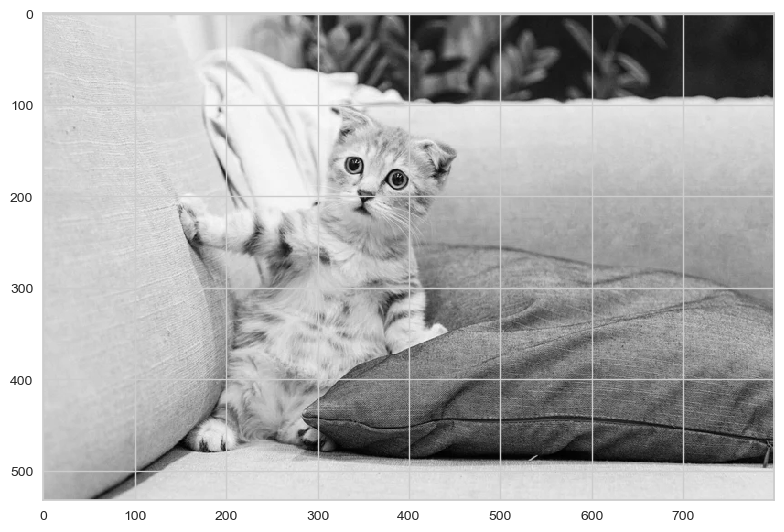

In [15]:
skIO.imshow(cat)

이미지를 분석할 때, 이미지에 숨겨져 있는 패턴을 찾아내는 '패턴 추출기'를 만들 수 있을까요?  
이미지 분석의 경우에는 filter라는 이름의 패턴 추출기를 사용합니다.

filter를 고양이 사진에 적용해 봅시다. 먼저 고양이 사진에 적용할 대표적인 세 가지 filter를 정의합니다.  
순서대로 Edge Detection, Sharpen, Gaussian Blur filter입니다.

filter는 그냥 봤을 때는 그저 숫자 덩어리이에요. 하지만 filter를 이용해서 convolution 연산을 하게 되면, 이미지 안에 숨겨져 있던 패턴이 드러나게 됩니다.  
따라서 이미지 분석에서 중요한 것은 이미지 내에 숨겨진 다양하고 복잡한 패턴을 추출해줄 수 있는 **다양한 filter를 만들어 내는 것**입니다.

In [16]:
# Edge Detection
edge = np.array([[-1, -1, -1],
                 [-1, 8, -1],
                 [-1, -1, -1]])
# Sharpen
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
# Gaussian Blur
blur = (1 / 16.0) * np.array([[1., 2., 1.],
                               [2., 4., 2.],
                               [1., 2., 1.]])

각각의 filter를 고양이 이미지에 적용해 봅시다.

#### Edge Detection

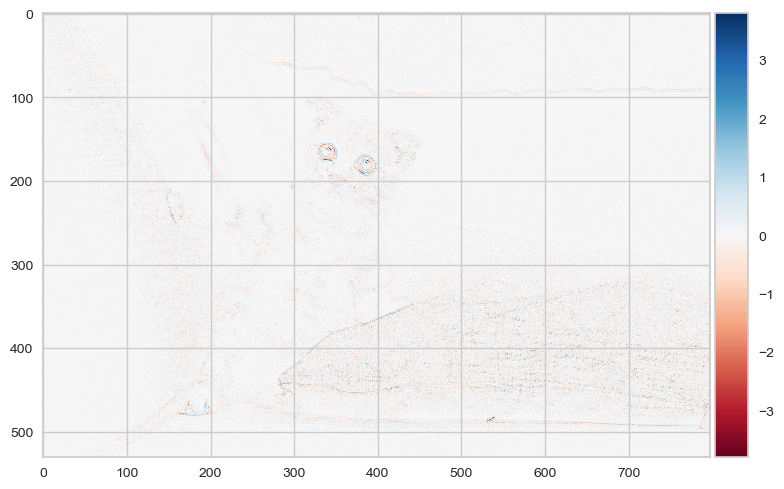

In [17]:
edge_im = sp.signal.convolve2d(cat, edge, 'valid')
skIO.imshow(edge_im)

#### Sharpen

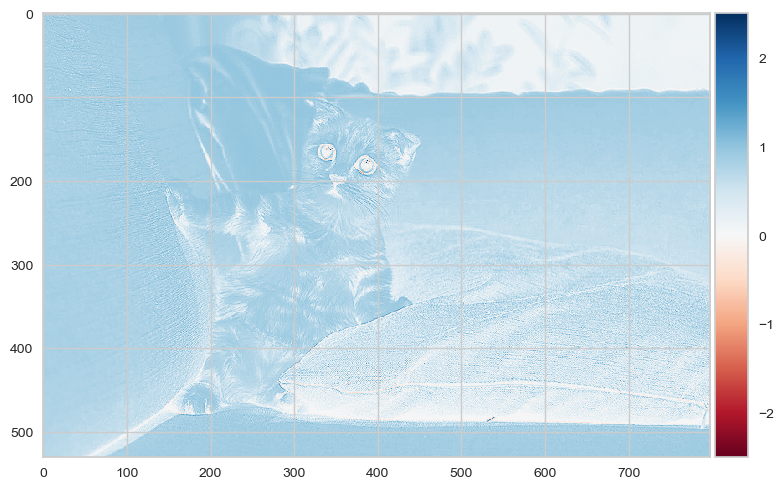

In [20]:
sharpen_im = sp.signal.convolve2d(cat, sharpen, 'valid')
skIO.imshow(sharpen_im)

#### Gaussian Blur

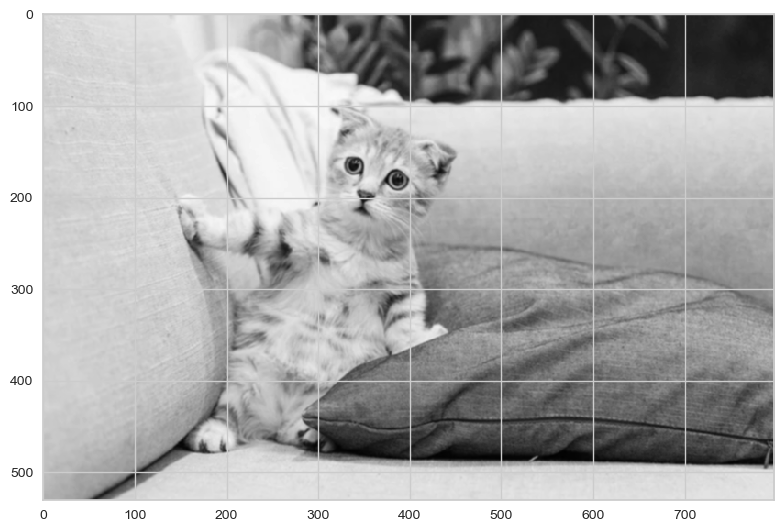

In [21]:
blur_im = sp.signal.convolve2d(cat, blur, 'valid')
skIO.imshow(blur_im)

+ 질문 : Edge Detection, Sharpen, Gaussian Blur filter의 역할은 무엇인가요? 다양한 이미지를 통해 알아낸 사실을 적어보세요.
  - Edge Detection: 윤곽선을 검출하는 역할을 합니다.
  - Sharpen: 이미지를 선명하게 만듭니다.
  - Gaussian Blur filter: 영상을 부드럽게 만듭니다. 영상의 노이즈를 제거할 때 사용하기도 합니다.

## Channel이 하나일 때 2개 이상의 Layer에서 Convolution 연산 (Padding)

### Convolution 연산을 계속하게 되면

Convolution 연산을 다시 살펴 봅시다. ☞ 참조 : https://www.freecodecamp.org/news/content/images/2019/07/convSobel.gif  
![](https://www.freecodecamp.org/news/content/images/2019/07/convSobel.gif)

합성곱 연산 반복 : Input 7x7 * Filter 3x3 → Output 5x5 ⇒ Input 5x5 * Filter 3x3 → Output 3x3 ㅁ⇒ Input 3x3 * Filter 3x3 → Output 1x1<Br>![https://www.researchgate.net/figure/The-receptive-field-of-each-convolution-layer-with-a-3-3-kernel-The-green-area-marks_fig4_316950618](https://www.researchgate.net/publication/316950618/figure/fig4/AS:495826810007552@1495225731123/The-receptive-field-of-each-convolution-layer-with-a-3-3-kernel-The-green-area-marks.png)

위에서 볼 수 있듯 Convolution 연산을 계속하게 되면 output의 크기가 줄어들기 때문에 최대 3개의 layer만 쌓을 수 있습니다.

하지만 hidden layer의 개수가 늘어날수록 다양하고 복잡한 패턴을 찾을 수 있습니다. 그럼 어떻게 더 많은 layer를 쌓을 수 있을까요?

### Padding!

더 많은 layer를 쌓을 수 있는 해결책은 padding을 사용하는 것입니다.

padding은 Filter를 적용하여 Conv 연산을 수행할 때 출력 Feature Map이 입력 Feature Map 대비, 계속적으로 작아지는 것을 막기 위해 적용합니다. Filter을 적용하기 전에 보존하려는 Feature map 크기에 맞게 입력 Feature Map의 좌우 끝과 상하 끝에 각각 열과 행을 추가한 뒤, 0 값을 채워 입력 Feature map 사이즈를 증가시킵니다.

이런 식으로 padding을 적용하면 깊은 layer를 쌓을 수 있습니다.  
> convolution 연산을 적용시킬 때 stride과 padding의 수와 같은 hyperparameter를 생각해 보는 것이 좋습니다.<Br>이에 대한 내용은 4번 노드에서 다룹니다.

참조 : Arden Dertat, 2017-11-09, Applied Deep Learning - Part 4: Convolutional Neural Networks<sup>[URL](https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2)</sup>
![](https://miro.medium.com/v2/resize:fit:720/1*W2D564Gkad9lj3_6t9I2PA@2x.gif)

## 마무리하며

- 합성곱<sup>Convolution</sup> 연산을 통해서 원본 데이터만 살펴볼 때 알기 어려운, 숨겨진 패턴을 찾을 수 있습니다.
- 딥러닝을 이용한 이미지 분석의 핵심은 숨겨진 패턴을 찾는 **자동 패턴 추출기**를 학습시키는 것입니다.

# CNN 이해하기 (2) 3-Channel Convolution

## 들어가며

## Channel이 3개일 때, 1-Layer의 Convolution 연산

## Hyper-Parameter에 대한 고민 (Kernel size, Channel size, Stride)

## 1x1 Convolution

## Transposed Convolution

## 마무리하며

# CNN 이해하기 (3) Pooling

## 들어가며

## Pooling 

## Convolution + Pooling 종합

## CNN 구조 구현하기

## 마무리하며

# 심화된 CNN 구조

## 들어가며

## Inception Module (Naïve Version) “GoogLeNet”

## Inception Module (1x1 convolution) “GoogLeNet”

## Skip Connection (ResNet)

## 마무리하며

# Transfer Learning

## 들어가며

## 대규모 모델 학습의 어려움

## Transfer Learning의 아이디어

## Transfer Learning의 적용

## 마무리하며

# Object Detection

## 들어가며

## Image Classification vs Localization vs Object Detection

## Object Detection 모델의 발전 과정

## R-CNN 모델을 통해 Object Detection 이해하기

## 마무리하며

# Segmentation

## 들어가며

## Semantic Segmentation vs Instance Segmentation

## U-Net 구조를 통해서 Segmentation 이해하기

## U-Net 코드를 통해서 이해 다지기

## 마무리하며

# Computer Vision Project

## 들어가며

## 프로젝트 1: Image Classification

## 프로젝트 2: Object Detection

## 마무리하며